In [18]:
import keras
from keras.models import load_model
import matplotlib.pyplot as plt
from binbot import Binbot
from helper import *
import sys

stock_name = "AAPL"
model_name = "model_60"
model = load_model("./models/"+model_name)
window_size = model.layers[0].input.shape.as_list()[1]

bot = Binbot(window_size, True, model_name)
_,data = get_data(stock_name)
print("Number of days we are playing", len(data))
batch_size = 32
state = get_state(data, 0, window_size + 1 )
total_gain = 0

tracker ={'close':[], 'action':[], 'reward':[]}
idx = 0

bot.inventory = []
l = (len(data) - 1)
for t in range(l):
    action = bot.act(state)
    next_state = get_state(data, t+1 , window_size +1)
    reward = 0
    tracker['close'].append(data[t])
    if action == 1:
        bot.inventory.append(data[t])
        print("Buy : " + str(data[t]))
        tracker['action'].append("Buy")
    
    elif action == 2 and len(bot.inventory) >0:
        strike_price = bot.inventory.pop(0)
        reward = max(data[t] - strike_price,0)
        total_gain += data[t] - strike_price
        print("Sell : " + str(data[t]) + " Current Total Gain :" + str(total_gain))
        tracker['action'].append("Sell")
    else:
        tracker['action'].append("Hold")
    tracker['reward'].append(reward)
    done = True if t == l-1 else False
    bot.memory.append((state, action, reward, next_state, done))
    state = next_state
    if done:
        print("-"*10)
        print("stock_name " + stock_name + " total gain : "  + str(total_gain))

    if len(bot.memory) > batch_size:
        bot.expReplay(batch_size)

Number of days we are playing 62
Buy : 227.25999450683597
Sell : 229.27999877929688 Current Total Gain :2.020004272460909
Buy : 179.5500030517578
Buy : 178.5800018310547
Sell : 184.82000732421875 Current Total Gain :7.290008544921847
Sell : 176.69000244140625 Current Total Gain :5.400009155273409
----------
stock_name AAPL total gain : 5.400009155273409


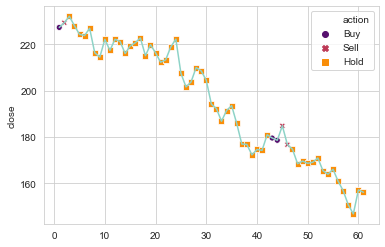

In [27]:
 import seaborn as sns
 dat = pd.DataFrame(tracker)
 x = [i+1 for i in range(len(data)-1)]
 sns.set_style("whitegrid")

 sns.scatterplot(x, y  = 'close',hue = 'action', style= 'action', palette="inferno", data = dat)
 sns.lineplot(x, y  = 'close',data = dat)

In [ ]:
sns.scatterplot(x, y=, data=tips)